# Agrupamiento K-Means

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [14]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [17]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('D:/UNAD/SEMESTRES/2024 05 QUINTO SEMESTRE/ANÁLISIS DE DATOS - (202016908A_1701)/Tarea 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv')

In [18]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,IdCliente,Genero,Edad,Ingreso Anual(k$),Puntuacion gastos (1-100)
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Femenino,20,16,6
3,4,Femenino,23,16,77
4,5,Femenino,31,17,40
5,6,Femenino,22,17,76
6,7,Femenino,35,18,6
7,8,Femenino,23,18,94
8,9,Masculino,64,19,3
9,10,Femenino,30,19,72


In [19]:
# Descripción de los datos
Datos.describe()

,IdCliente,Edad,Ingreso Anual(k$),Puntuacion gastos (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

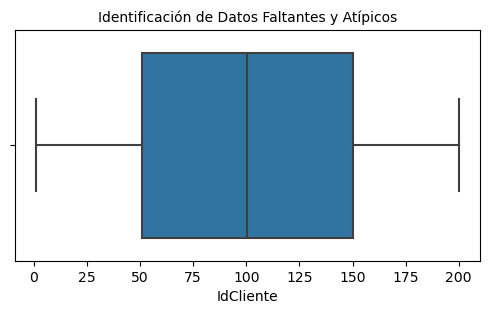

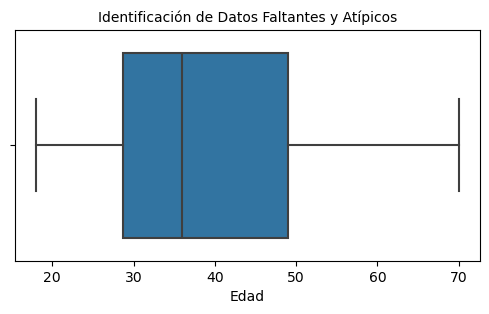

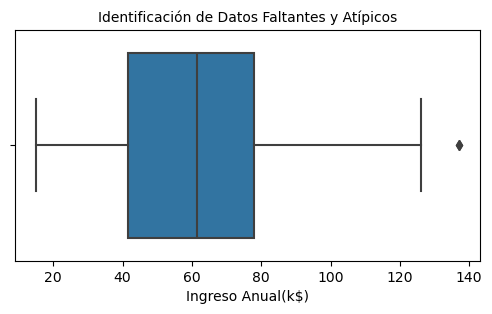

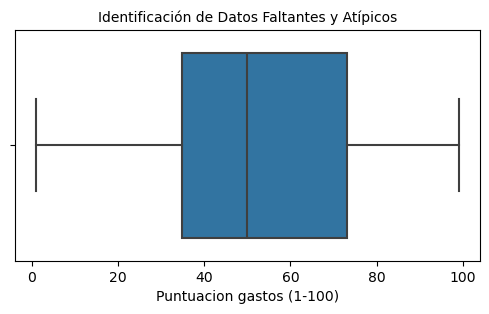

In [21]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['IdCliente'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Ingreso Anual(k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Puntuacion gastos (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario..

In [22]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en IdCliente: ",Datos['IdCliente'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual(k$): ",Datos['Ingreso Anual(k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuacion gastos (1-100): ",Datos['Puntuacion gastos (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en IdCliente:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual(k$):  0
Cantidad de Registros con cero en Puntuacion gastos (1-100):  0


In [24]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['IdCliente']=Datos['IdCliente'].replace(0,Datos['IdCliente'].mean())
Datos['Edad']=Datos['Edad'].replace(0,Datos['Edad'].mean())
Datos['Ingreso Anual(k$)']=Datos['Ingreso Anual(k$)'].replace(0,Datos['Ingreso Anual(k$)'].mean())
Datos['Puntuacion gastos (1-100)']=Datos['Puntuacion gastos (1-100)'].replace(0,Datos['Puntuacion gastos (1-100)'].mean())


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

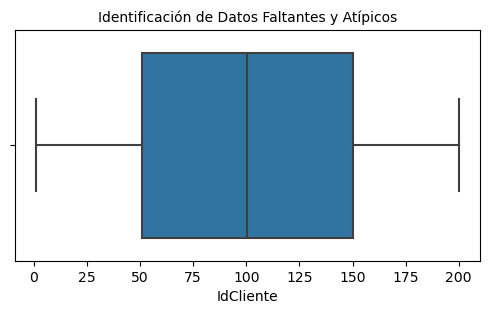

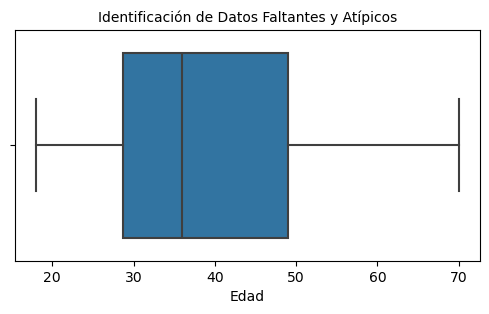

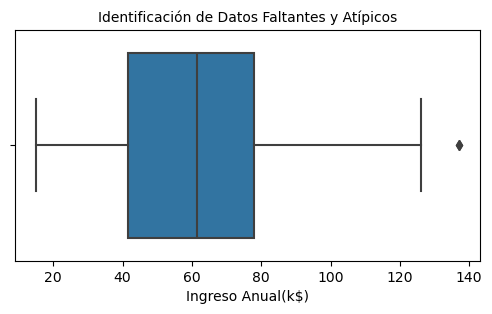

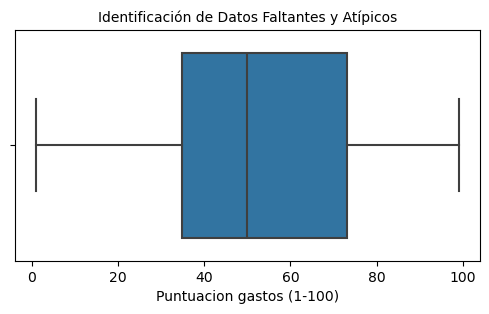

In [25]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['IdCliente'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Ingreso Anual(k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Puntuacion gastos (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [27]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Genero']=Datos['Genero'].replace('Masculino',1) #se reemplaza musculino por el numero 1
Datos['Genero']=Datos['Genero'].replace('Femenino',0) #se reemplaza femenino por el numero 2

In [28]:
# Realizamos lectura de los Datos nuevamente

Datos.head(10)

,IdCliente,Genero,Edad,Ingreso Anual(k$),Puntuacion gastos (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [35]:
#Conteo de Datos Atípicos

edad_minima=18
edad_maxima=60

ingreso_minimo_anual = 20
ingreso_maximo_anual = 120

puntuacion_minima_gastos = 10
puntuacion_maxima_gastos = 95


Total_Atipicos_edad =((Datos['Edad']<edad_minima)|(Datos['Edad']>edad_maxima)).sum()
print("El total de datos atípicos en edad es {}".format(Total_Atipicos_edad))

Total_Atipicos_ingreso_anual =((Datos['Ingreso Anual(k$)']<ingreso_minimo_anual)|(Datos['Ingreso Anual(k$)']>ingreso_maximo_anual)).sum()
print("El total de datos atípicos en Ingreso Anual(k$) es {}".format(Total_Atipicos_ingreso_anual))

Total_Atipicos_puntuacion_gatos =((Datos['Puntuacion gastos (1-100)']<puntuacion_minima_gastos)|(Datos['Puntuacion gastos (1-100)']>puntuacion_maxima_gastos)).sum()
print("El total de datos atípicos en Puntuacion gastos (1-100) es {}".format(Total_Atipicos_puntuacion_gatos))

El total de datos atípicos en edad es 17
El total de datos atípicos en Ingreso Anual(k$) es 16
El total de datos atípicos en Puntuacion gastos (1-100) es 18


In [37]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Edad']<edad_maxima)&(Datos['Edad']>edad_minima)]
Datos=Datos[(Datos['Ingreso Anual(k$)']<ingreso_maximo_anual)&(Datos['Ingreso Anual(k$)']>ingreso_minimo_anual)]
Datos=Datos[(Datos['Puntuacion gastos (1-100)']<puntuacion_maxima_gastos)&(Datos['Puntuacion gastos (1-100)']>puntuacion_minima_gastos)]

In [38]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 16 to 193
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   IdCliente                  139 non-null    int64
 1   Genero                     139 non-null    int64
 2   Edad                       139 non-null    int64
 3   Ingreso Anual(k$)          139 non-null    int64
 4   Puntuacion gastos (1-100)  139 non-null    int64
dtypes: int64(5)
memory usage: 6.5 KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Características de interes para el agrupamiento:
* Ingreso Anual
* Puntuacion gastos (1-100)

In [39]:
# Filtrar columnas del modelo 

Datos = Datos[["Edad","Ingreso Anual(k$)","Puntuacion gastos (1-100)"]]

In [40]:
# Revisión de los datos de las variables objetivo

Datos.head(20)

,Edad,Ingreso Anual(k$),Puntuacion gastos (1-100)
16,35,21,35
17,20,21,66
18,52,23,29
20,35,24,35
21,25,24,73
23,31,25,73
24,54,28,14
25,29,28,82
26,45,28,32
27,35,28,61


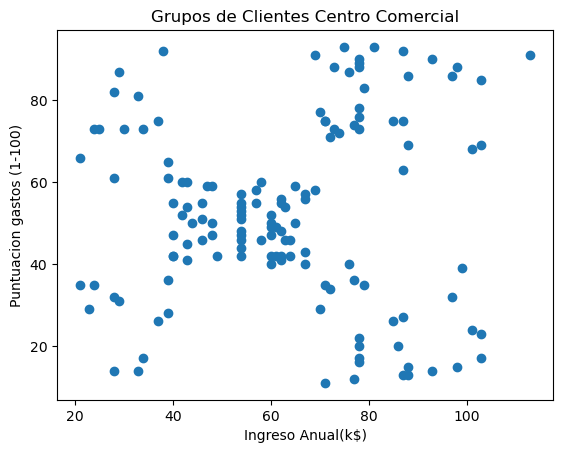

In [41]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Ingreso Anual(k$)'], Datos['Puntuacion gastos (1-100)'])
plt.xlabel('Ingreso Anual(k$)')
plt.ylabel('Puntuacion gastos (1-100)')
plt.title('Grupos de Clientes Centro Comercial')
plt.show()

## 4.Entrenar el modelo configurando los diferentes hiperparámetros.

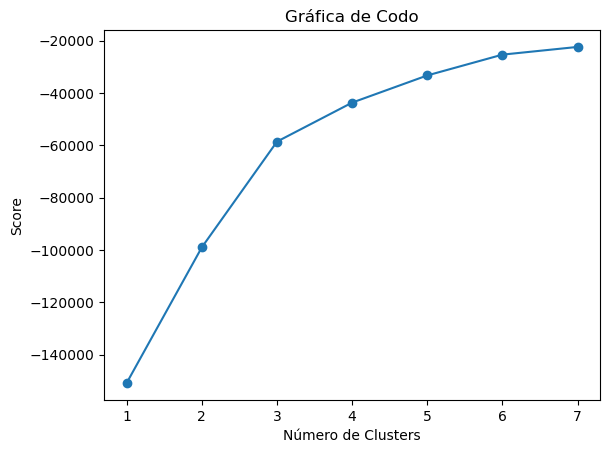

In [42]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [75]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [76]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Edad  Ingreso Anual(k$)  Puntuacion gastos (1-100)  Grupo
16     35                 21                         35      4
17     20                 21                         66      0
18     52                 23                         29      4
20     35                 24                         35      4
21     25                 24                         73      0
..    ...                ...                        ...    ...
188    41                103                         17      3
189    36                103                         85      2
190    34                103                         23      3
191    32                103                         69      2
193    38                113                         91      2

[139 rows x 4 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [77]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         139         |
|  Coeficiente Silhouette  | 0.43139432023009083 |
| Indice Calinski Harabasz | 118.08834685498293  |
|  Indice Davies Bouldin   | 0.8344465821258453  |
+--------------------------+---------------------+


## 6.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

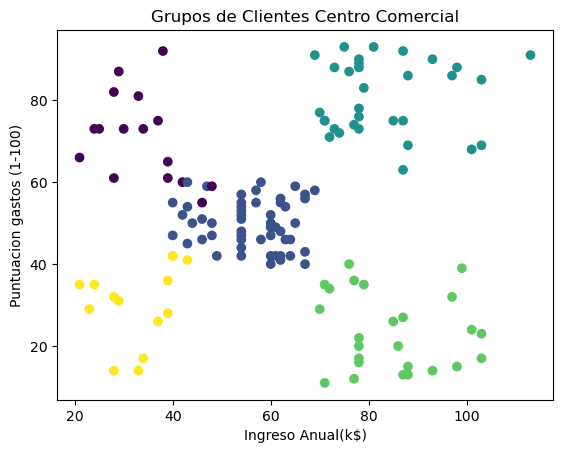

In [78]:
plt.scatter(Datos['Ingreso Anual(k$)'], Datos['Puntuacion gastos (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual(k$)')
plt.ylabel('Puntuacion gastos (1-100)')
plt.title('Grupos de Clientes Centro Comercial')
plt.show()

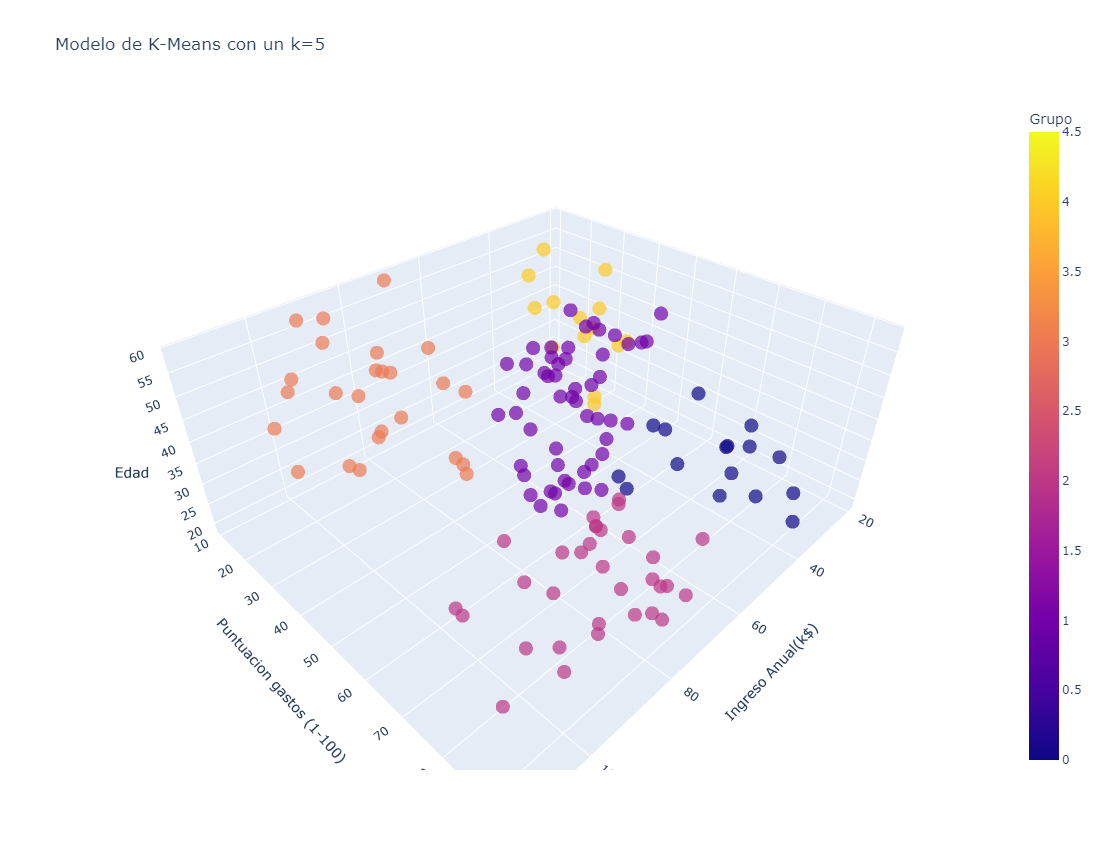

In [79]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos, x='Ingreso Anual(k$)', y='Puntuacion gastos (1-100)', z='Edad', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

## 7. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

* Coeficiente de Silhouette: El valor del coeficiente de Silhoutte es de 0.43 aproximadamente, como podemos obvservar no se acerca mucho a 1, podemos afirmar que existe una optima separación de los grupos, esto nos indica que que los grupos son algo diferentes, aunque observamos en las graficas que hay pequeñas areas en comun, en conclusión, una puntuacion que se acerca a 1, seria lo mas recomendable.
* Índice de Calinski-Harabasz: El valor del Índice de Calinski-Harabasz es de  118.08 aproximadamente, lo que nos indica que los grupos no estan bien separados, un valor mas alto del indice nos informa que existe una buena separación entre los grupos, lo que indica que nuestra agrupación no esta bien separada, pero observando las graficas se opto por dividir los grupos en una optima cantidad.
* Indice Davies Bouldin: El valor del Indice Davies Bouldin es de 0.83 aproximadamente, es una puntuación alta, lo que nos indica que existe un nivel alto de similitud entre los grupos, Por lo general es preferible optener una puntuación mas baja, lo cual nos indicaria que hay una menor similitud entre los grupos. En este caso, nuestra puntuacion separacion informa una alta separación entre los clusters.